
# Dimension Reduction

When working with machine learning algorithms we spend most of our time cleaning and preparing our data inorder to feed it to the ML model. We spend lot of time analyzing data and various features as well. Well, the idea seems really good when we have limited number of features, say features < 100, what if the features are 200, 300, 500 or above 1000 ?. Well, in this case it is really difficult for us to understand the data due to excessive number of features, which we can also call curse of dimensionality. On, one hand it is good to have loads of data for analysis, and on the other hand, it is quite not possible to go at microscopic level. so how we deal with it ??

The simple answer is using dimensionality reduction techniques. There, are heaps of methods and approach that we can follow to handle such a large number of features and come up with certian number of features which we can handle and analyze quite comfortably without loosing essence of the original data.


The main idea of dimension reduction is to select subsets of features from the originals which captures as much information as the original variables making sure that we donot loose the key information at the same time. Our main goal is to capture the data with high variance that impacts the result and drop the features with minimum variance.


### Use of dimension reduction
 
 As discussed above there are many uses of dimension reduction, one being better understanding and analsis of the data. similarly, another reason is to remove the curse of dimensionality to prevent the model from overfitting. When there are large number of features, our model is more likely to learn more noise and consequently, suffer from overfitting, dimension reduction quite easily tackles this problem. Similalry, it also makes visualization easier, which gives us better understanding. Likewise, memory space  and time are another factor that comes into consideration.

### Dimension Reduction Techniques

There are two main ways to perform dimension reduction:

* Keeping only very important and relevant features from orignal dataset (also called feature selection)
* Finding smaller set of new variable, each variable being combination of input variable containing same information as the orignal variables (dimension reduction technique)

### Feature Selection:
The technique of keeping the most relevant varaibles from the original dataset
 * <b>Missing Value Ratio</b>:
 If the given data has has too many missing values, the wise move is to drop the features having large number of null values which will reduce the number of features as well.
 
 For example in a given dataset if certain feature has more than 60% of missing values, it is not a great idea to impute those missing values, instead we should drop these variables, since they are more likely to give less information.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
#loading the data
train_df = pd.read_csv('home-credit-default-risk/application_train.csv')
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


From the given table we can see that there are 122 features, now lets see the null values of these features

In [17]:
missing_values =train_df.isnull().sum()/len(train_df)*100
missing_values[missing_values > 0].sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

from the above results we can observer that there are heaps of missing values, so, lets choose our threshold to be 0.6, and drop all those features having more than 60% of data as null.

In [7]:
#using heat map to checkout these null values
def visualize_nulls(df):
    sns.heatmap(df.isnull(), cbar = False, yticklabels=False)

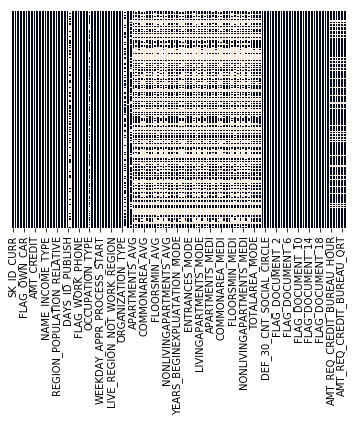

In [8]:
visualize_nulls(train_df)

Like the table before, the heat map shows lots of null values, lets drop those having more than 60% of null

In [18]:
#getting null values more than 60%
null_values = [col for col in train_df.columns if train_df[col].isnull().sum() >= train_df.shape[0]/1.66]
null_values

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

so, there are 17 features having more than 60% of missing values now we can drop these features from our data frame.

In [19]:
#creating copy of original dataframe as a backup
new_df = train_df[:]
new_df.shape

(307511, 122)

In [21]:
new_df = train_df.drop(columns=null_values, axis=1)
new_df.shape

(307511, 105)

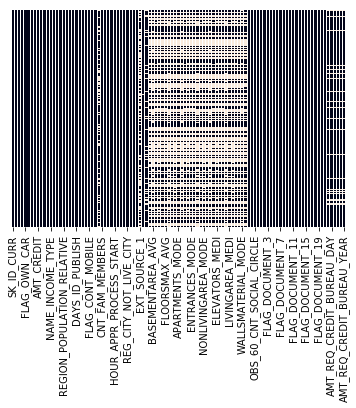

In [22]:
visualize_nulls(new_df)

In [25]:
# impute the remaining null value
#function to handle categories
def handle_categorical(multcolumns, df):
    copy = pd.DataFrame()
    i = 0
    for field in multcolumns:
        temp  = df[field].fillna(df[field].mode()[0])
        df.drop([field], axis =1, inplace = True)
        
        if i == 0:
            copy = temp.copy()
            
        else:
            copy = pd.concat([copy, temp], axis=1)
            
        i += 1
        
    copy = pd.concat([df, copy], axis=1)
    return copy

In [26]:
#function to fill numerical values
def handle_numValues(multcolumns, df):
    copy = pd.DataFrame()
    i = 0
    for field in multcolumns:
        temp = df[field].fillna(df[field].mean())
        df.drop([field], axis = 1, inplace = True)
        
        if i == 0:
            copy = temp.copy()
            
        else:
            copy = pd.concat([copy, temp], axis=1)
            
        i += 1
        
    copy = pd.concat([df, copy], axis= 1)
    return copy

In [27]:
#defining qualitative and quantative columns:
qual_cols = [col for col in new_df.columns if new_df[col].dtype in ['object', 'str']]
quan_cols = [col for col in new_df.columns if new_df[col].dtype not in ['object','str']]

In [37]:
print("Quan columns: {} | Qual Columns: {} | Total Columns: {}".format(len(quan_cols), len(qual_cols), (len(quan_cols+qual_cols))))

Quan columns: 90 | Qual Columns: 15 | Total Columns: 105


In [38]:
#filling quantitave features
new_df = handle_numValues(quan_cols, new_df)

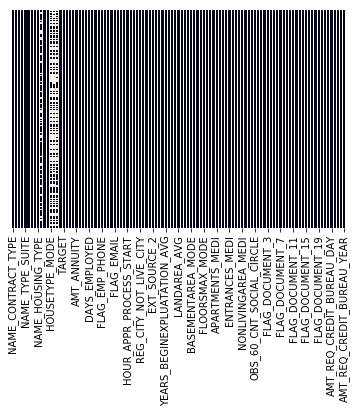

In [41]:
visualize_nulls(new_df)

Well, that has reduced to a great extent.

In [43]:
#filling qualitative features
new_df = handle_categorical(qual_cols, new_df)

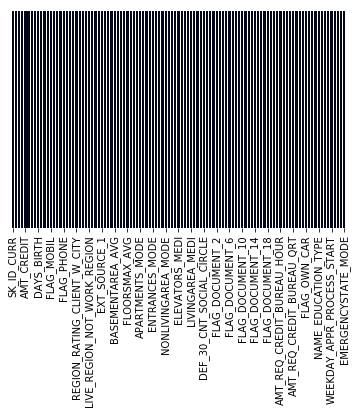

In [44]:
visualize_nulls(new_df)

In [48]:
new_df.isnull().sum().max()

0

Finally, there are no null values in our data now, lets proceed to next type

* <b> Low Variance Filter:</b>

We use this technique to drop the constant variables from our dataset, which doesnot affect the target vaiable because of its low variance.

For example, if there are several features having same value, say 1, even if we use these variables they are not going to improve the model performance, because these variable will have zero variance so we drop them.

In this technique we find the variance of each vaiable and then we drop those variable havin the lowest variance as opposed to the other features.

<i>Note: The features with low variance will not affect the target variable at all</i>


In [50]:
#now lets find the variance of  the variables
new_df.var().sort_values(ascending = True)

FLAG_MOBIL                      3.251916e-06
FLAG_DOCUMENT_12                6.503811e-06
FLAG_DOCUMENT_10                2.276297e-05
FLAG_DOCUMENT_2                 4.227326e-05
FLAG_DOCUMENT_4                 8.129156e-05
REGION_POPULATION_RELATIVE      1.913043e-04
FLAG_DOCUMENT_7                 1.918269e-04
FLAG_DOCUMENT_17                2.665869e-04
FLAG_DOCUMENT_21                3.348363e-04
FLAG_DOCUMENT_20                5.070432e-04
FLAG_DOCUMENT_19                5.947485e-04
FLAG_DOCUMENT_15                1.208253e-03
YEARS_BEGINEXPLUATATION_AVG     1.796449e-03
YEARS_BEGINEXPLUATATION_MEDI    1.837572e-03
FLAG_CONT_MOBILE                1.863122e-03
YEARS_BEGINEXPLUATATION_MODE    2.135818e-03
NONLIVINGAREA_AVG               2.166394e-03
NONLIVINGAREA_MEDI              2.206671e-03
NONLIVINGAREA_MODE              2.212170e-03
LANDAREA_AVG                    2.677379e-03
LANDAREA_MODE                   2.714884e-03
LANDAREA_MEDI                   2.742633e-03
BASEMENTAR

From the above table we can clearly see that  the variance of some features are extreme low when compared to others, so we can safely drop these features and this is how we apply low variance filter.

In [63]:
numeric = new_df.select_dtypes(include=[np.number])
var = numeric.var()
#neumeric variables are quan cols computed before
variable = [ ]
for i in range(0, len(var)):
    if var[i] >= 25: #setting the threshold as 25%
        variable.append(quan_cols[i+1])

In [64]:
variable

['TARGET',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_2']

The above featues are the one's having variance greater than 25%

In [65]:
new_df.shape

(307511, 105)

In [66]:
new_df = new_df.drop(columns=variable, axis=1)
new_df.shape

(307511, 95)

* <b> High Correlation Filter :</b>

In this method we find highly correlated features and drop one of them. 
High correlation between two variables means they have similar trends and are likely to carry similar information. So there is not really any reason to keep both of them because instead of improving the performance of the model, this may have a negative effect. So, we calculate the correaltion between independent features and if the correlation coefficient between them crosses certian threshold value, we drop one of the variable. 

In general, we shold keep variables which show descent or high correlation with the target varaible

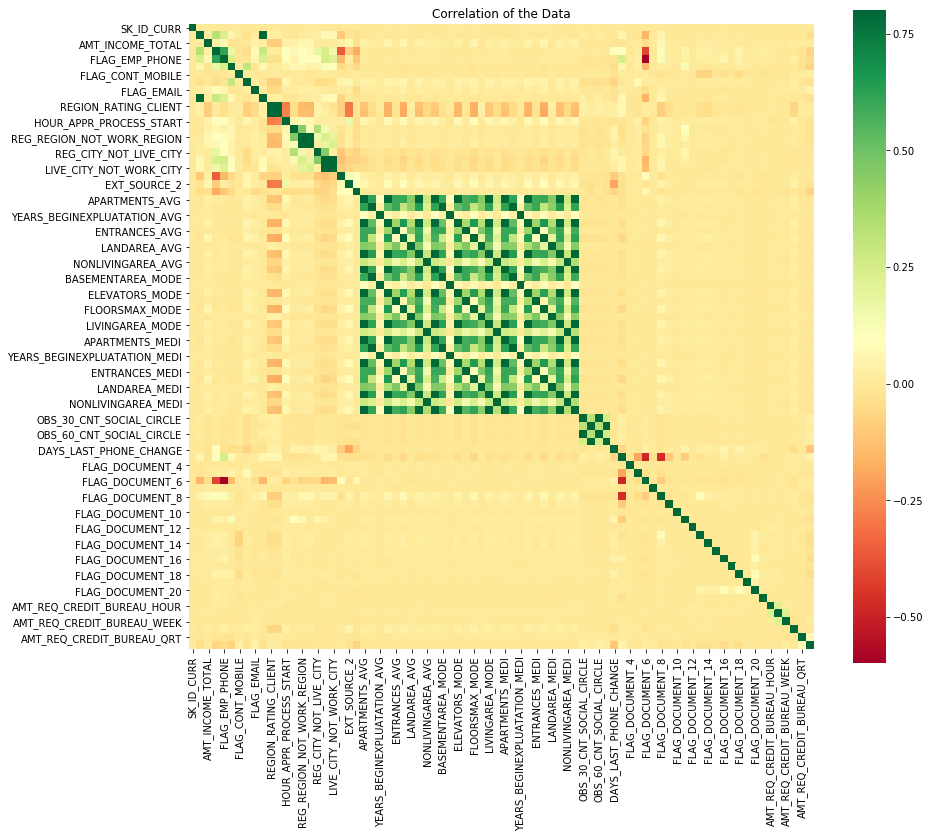

In [70]:
f, ax = plt.subplots(figsize = (14,12))

corr = new_df.corr()
sns.heatmap(corr, cmap='RdYlGn', ax = ax, annot=False, square=True, vmax=.8)
ax.set_title("Correlation of the Data")
plt.show()

So, from the figure we can see that some variables really have high correlation with each other in our dataset. In General, if the correlation between pair of variables is greater than 0.5 or 0.6 we should seriously consider dropping one variable

* <b>Random Forest </b>

One of the most commonly used techniques which tells us importance of each feature present in the dataset.
We can simply find the importance of each features and then just keep the top most important features, resulting in a dimensionality reduction.

To use this technique we need to convert the data into numeric form by applying one hot encoding, as Random Forest takes only numeric inputs.

In [79]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 1, max_depth = 10)
new_df = pd.get_dummies(new_df)
model.fit(new_df, train_df.TARGET)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

 After fitting the model, lets plot the feature importance graph:

In [80]:
3

3

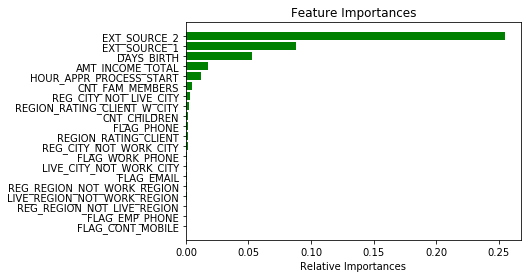

In [84]:
features = new_df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:20]) #taking top 20 features 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

Based on the above graph, we can hand pick the top most features to reduce the dimensionality in our dataset. Or we can alsu use selectfrommodel to do so

In [85]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
FIt = feature.fit_transform(new_df, train_df.TARGET)
FIt.shape

(307511, 22)

So, our algorithm has choosen 22 best features

###  Dimensionality Reduction
* <b> Factor Analysis:</b>

Suppose we have two variable: income and education, these variables will potentially have a high correlation, as people with higher education  are more likely to have higher income.

In Factor Analysis technique, variables are groped by their correlations, i.eall variables in a particular group wil have a high correlation among themselves, but low correlation with variables of other groups. Here each group is known as factor, these factors are small in number in comaprision to the original data.


In [7]:
train_df = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
train_df.shape

(60000, 785)

`These are images files so we will cknver these into numpy array, so as to perform mathematical operations and also plot the images and flatten the image

In [ ]:
new_df = np.array(train_df, dtype = 'float32')
image = []
for i in range(0, train_df.shape[0]):
    img = new_df[i].flatten()
    image.append(img)
image = np.array(image)

now we create a dataframe containg thes pixel values and also their corresponding labels

In [96]:
feat_cols = ['pixel'+str(i) for i in range(image.shape[1] )]
df = pd.DataFrame(image, columns=feat_cols)
df['label'] = train_df['label']
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


we will decompos the dataset using factor analysis

In [97]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=3).fit_transform(df[feat_cols].values)

Here n_componests will decide the number of factors in the transformed data. After transforming the data it is time to visualize the result

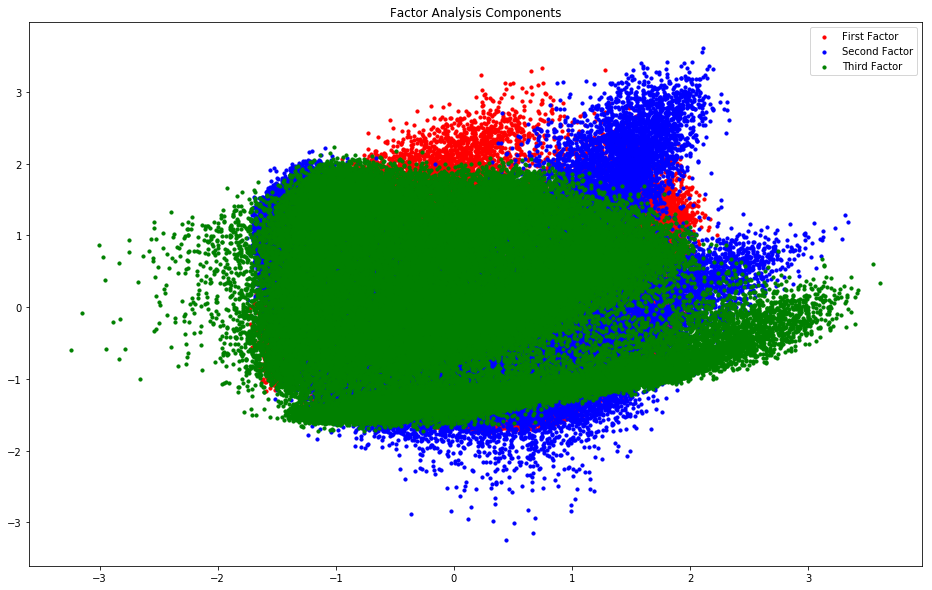

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.title("Factor Analysis Components")
plt.scatter(fa[:,0], fa[:,1], c='r', s=10)
plt.scatter(fa[:,1], fa[:,2], c='b', s=10)
plt.scatter(fa[:,2], fa[:,0], c='g', s=10)
plt.legend(("First Factor", "Second Factor", "Third Factor"))

We can see different factors in the above graph, here X axis and Y axis represent the values of decomposed factors. As mentioned earlier, it is hard to observe thes fators individually but we have been able to reduce the dimensions of our data succesfully.

* <b>Principal Component Analysis (PCA) :</b>

PCA divides the data into set of components into a set of components and tries to explain as much variance as possible

This technique helps us in extracting a new set of variables form original large features by rotating or transforming the existing data co ordinate system to new co-orinate system with soul purpose of projecting the data into the direction having highest variance. In simple words, it tries to find the direction in which the variance of the data is maximum and then project the data in to that direction. The final feature variables are called the principal components.

So, unlike the other feature selection techniques, in this tecnique principal component is a linear combination of the original variables. These components are extracted in such a way that first principal components explain the maximum variance, second tries to explain the remaining variance and is uncorrelated to the first one and so on

In all the projections, it makes sure that the original information is not penalized and to project in any new direction U for data X, U must be a unit vector and the projection is simply done by dor ptoduct of X and u
=>  X.U = U.X = UTX

So, as discussed before we want to find direction U with maximum variance, when doing the projection, so what is the direction of U??

Ans: Let Sigma be d x d covariance matrix of X , then the variance of X in direction of U (the variance of XU) is UT(Sigma)U

<i>Note: The variance in any direction U us UTX, where UT is the transpose of U</i>

so our goal is to look for direction with highest varaince, so we want to maximize the value of UT(Sigma)U

and how do we do that ??

=> Well, we maximize the above value by setting U to the first eigen vetor of (Sigma) and the maximum value is the corresponding eigen value.

#### summary: to reduce the dimension using PCA, we transform the existing co-ordinate system to the new one by finding the direction which captures the maximum variance of the data. For this, firstly we find (Sigma) which is d x d covariance matrix of input features X, and this (Sigma) has number of eigen vector assocated with it and this is exactly what we want, we take top K components and to the projection of our data X by using above formula in this direction U and obtain the reduced dimension. ALSO the K components must be orthogoanal to each other and must be a unit vector

In [144]:
#we have our original data of fashion mnist in train_df
train_df.shape

(60000, 785)

In [145]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

The fasion mnist dataset that we are using has 10 types of fashion wears where is represented by the label and rest of the 784 features are used to form the image itself. So, before performing the dimension reduction lets checkout the some images first

In [8]:
new_df = np.array(train_df, dtype = 'float32')
#data points
x_train = new_df[:,1:]
#labels
y_train = new_df[:,0]

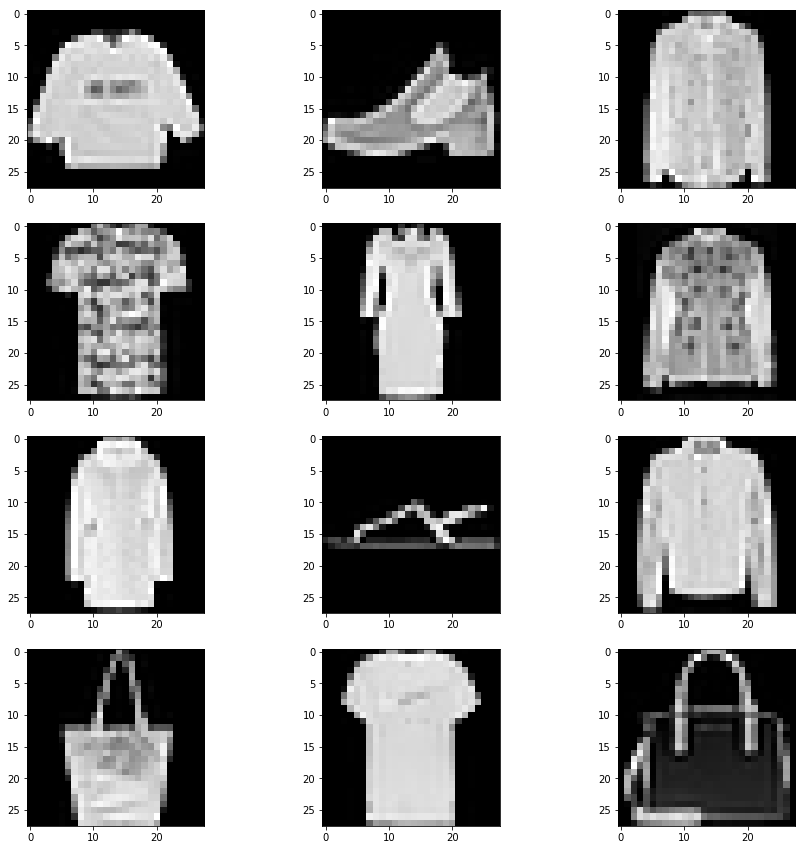

In [168]:
fig = plt.figure(figsize=(15,15))

for i in range(0,12):
    ax = fig.add_subplot(4,3,i+1)
    plt.imshow(x_train[i].reshape(28,28))

So as shown above we hame these types of datasets of clothing, so now lets perform dimension reduction with PCA

In [9]:
#train_df is our original df now lets sepearate to labels and input
df_label = train_df.label
df_train = train_df.drop(['label'], axis = 1)

In [10]:
new_cols = [col for col in df_train.columns if col not in['label']]

In [11]:
df_train.shape

(60000, 784)

In [195]:
#implementing The Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_results = pca.fit_transform(df_train[new_cols].values)

Text(0, 0.5, 'Cumulative ExPlained Variance')

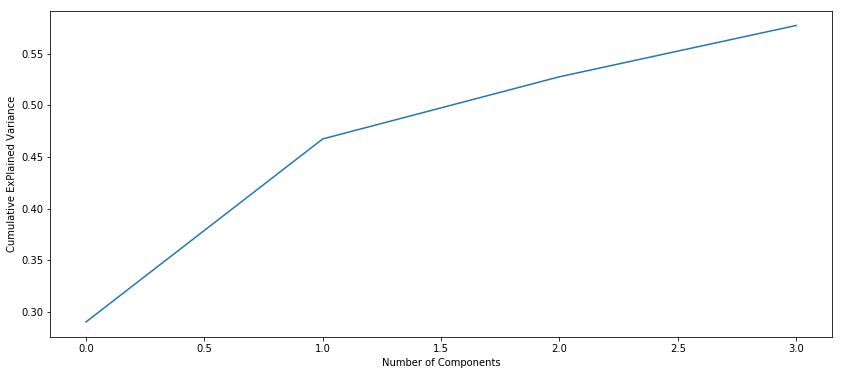

In [196]:
plt.figure(figsize=(14,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel("Cumulative ExPlained Variance")

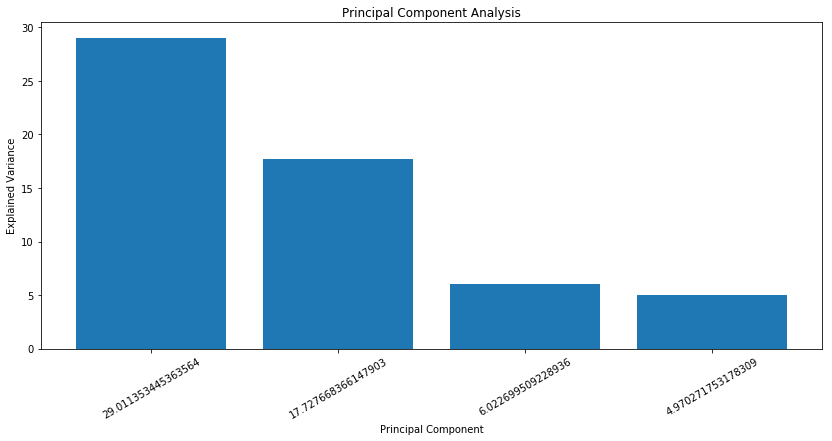

In [197]:
index = np.arange(len(pca.explained_variance_ratio_))
plt.figure(figsize=(14,6))
plt.title('Principal Component Analysis')
plt.bar(index, pca.explained_variance_ratio_*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(index, pca.explained_variance_ratio_*100, fontsize=10, rotation = 30)
plt.show()

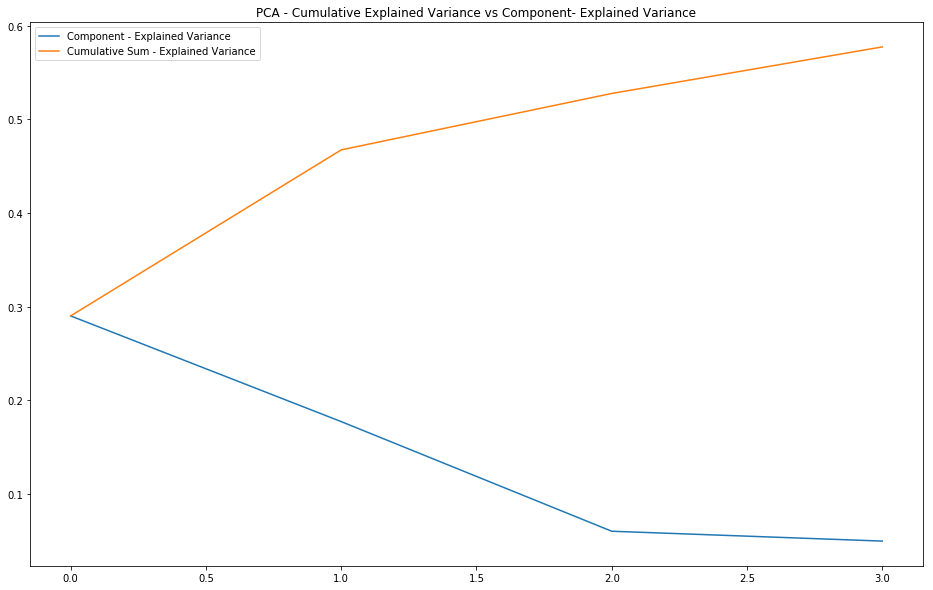

In [198]:
plt.figure(figsize=(16,10))
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA - Cumulative Explained Variance vs Component- Explained Variance")
plt.legend(("Component - Explained Variance","Cumulative Sum - Explained Variance"))

In the above graph the blue line represents component-wise explained variance whereas, the orange line represents the cumulative explained variance. We are able to learn around 60% variance in the dataset using just four components. Now let's visualize each of these decomposed components.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


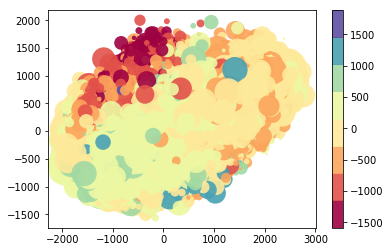

In [220]:
plt.scatter(pca_results[:,0], pca_results[:,1], pca_results[:,2], pca_results[:,3], edgecolors='none', alpha=0.9, cmap=plt.cm.get_cmap('Spectral', 8))
plt.colorbar()

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Text(0.5, 0.98, '4-Component PCA')

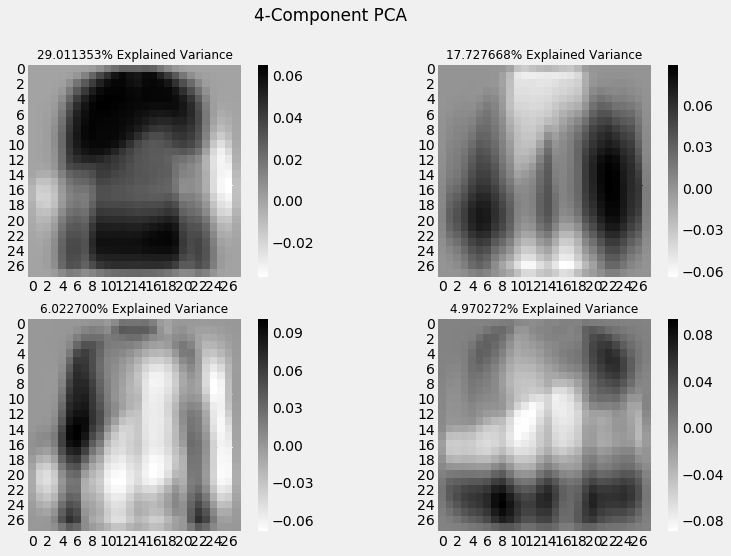

In [225]:
import seaborn as sns
import matplotlib.style as style
#style.available
style.use('fivethirtyeight')
fig, axarr = plt.subplots(2,2, figsize = (12,8))
sns.heatmap(pca.components_[0,:].reshape(28,28), ax = axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1,:].reshape(28,28), ax = axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2,:].reshape(28,28), ax = axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3,:].reshape(28,28), ax = axarr[1][1], cmap='gray_r')
axarr[0][0].set_title("{0:2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100), fontsize = 12)
axarr[0][1].set_title("{0:2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100), fontsize = 12)
axarr[1][0].set_title("{0:2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100), fontsize = 12)
axarr[1][1].set_title("{0:2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100), fontsize = 12)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

hat is what we get when we take only 4 components, each additional dimension we add to our PCA captures less and less variance in the model. The first model has highest variance and it keeps on decreasing

* <b>Singular Value Decomposition (SVD)</b>

SVD decomposes the original variables into three constituent matrices. It is essentially used to remove redundant features from the dataset. It uses the concpet of EigenValues and EigenVector to determine those three matrices. Turnsout the concept of EigenVector is very important in Dimension reduction as PCA also uses the EigenVector to find the direction with maximum variance

In [229]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(df_train[new_cols].values)
svd.shape

(60000, 3)

Let's visualize the transformed variables by plotting the first three principal components:

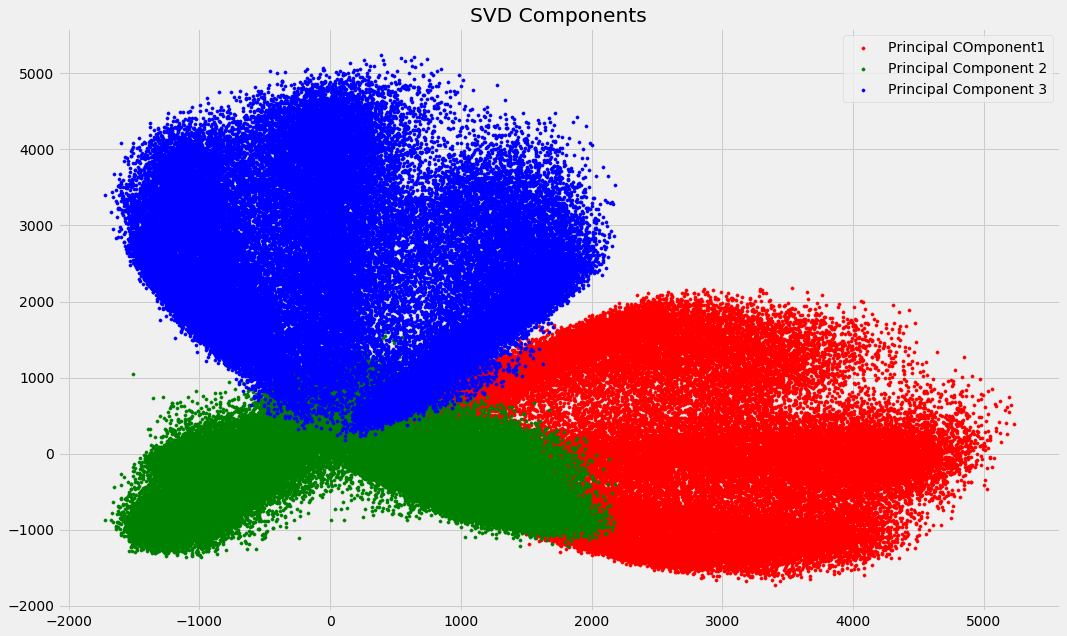

In [231]:
plt.figure(figsize=(16,10))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1], c='r', s=10)
plt.scatter(svd[:,1], svd[:,2], c='g', s=10)
plt.scatter(svd[:,1], svd[:,0], c='b', s=10)
plt.legend(("Principal COmponent1","Principal Component 2", "Principal Component 3"))

The above scatter plot shows us the decomposed components very neatly. As described earlier, there is not much correlation between these components.

* <b> Independent Component Analysis </b>

Independent Component Analysis (ICA) is based on information theory and is also one of the most used dimensionality reduction techiques. The major difference between PCA and ICA is that PCA looks for uncorrelated factor while ICA looks for independet factors.

If two variables are uncorrelated, it means there is no linear relation between them. If they are undependent, it means, they are not dependent on other variables. For example, the age of person is independent on what the person eats, or how much television he/she watches.

This algorithm assumes that the given variable are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e they are not dependent on other variables and hence they are called indepdnent components of observed data.

The most common method to measure independence of components is Non-Gaussianity:
* As per central limit theorem, distribution of the sum of independent components tends to be normally distributed (Gaussian)

* so we can look for the transformations that maximize the kurtosis of each component of the independent components. Maximizing the kurtosis will make the distribution non-gaussian and hence we will get independent components.


In [232]:
#implementation
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=3, random_state=12)
X = ICA.fit_transform(df_train[new_cols].values)

Here, n_components will decide the number of components in the transformed data. We have transformed the data into 3 components using ICA. Lets visualize how well it has transformed the data

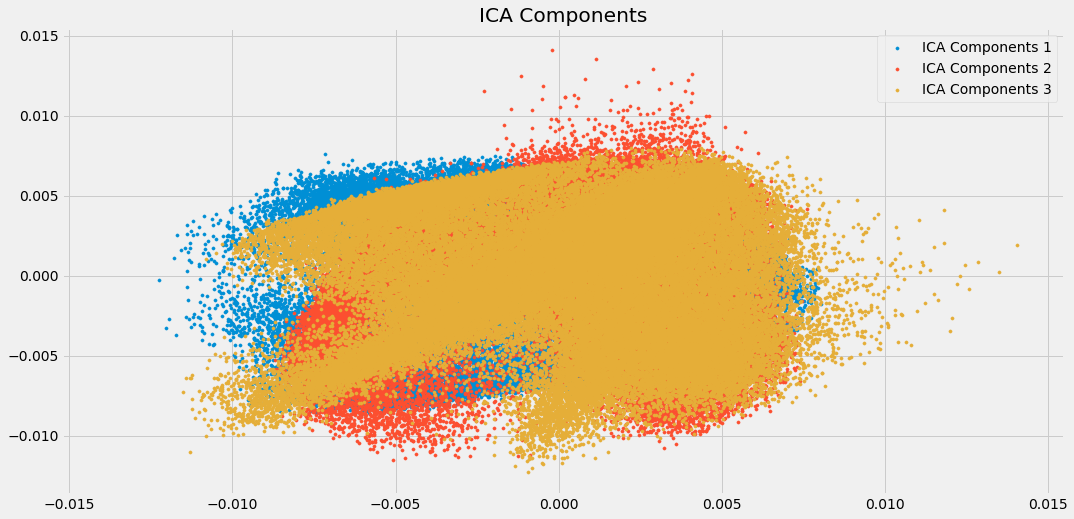

In [239]:
plt.figure(figsize=(16,8))
plt.title("ICA Components")
plt.scatter(X[:,0], X[:,1], s=10)
plt.scatter(X[:,1], X[:,2], s=10)
plt.scatter(X[:,2], X[:,0], s=10)
plt.legend(("ICA Components 1","ICA Components 2","ICA Components 3"))

The data has been separated into different independent components which can be seen very clearly in the above image. X-axis and Y-axis represent the value of decomposed independent components.

### Non Linear Methods

* <b> ISOMAP </b>

This method uses projection based techniques, which is also used by the principal component (PCA) as discussed before. ISOMAP is an algorithm which aims to recover full low-dimensional representation of a non linear manifold . It assumses that the manifold is smooth. It assumes that for any pair of points on manifold, the geodesic distance (shortest distance between two points on a curved surface) between the two points is equal to the Euclidean distance(shortest distance between two points on a straight line. ISOMAP algorithm is given briefly below:

* Firstly it calculates distance between all pair of data points.
* After that, it determines data points that are the neighbors of manifold
* And then it generates a neighborhood graph. G = G(V,E) where V is the set of vertices (x1,...xn) input data points and E is the set of edges indicating the relationship

* Now it calculates the geodesic distance between the pairs of points in manifold by graph distance (shortest distance between all pairs of points in graph G)
* After having the distance, it forms symmentric (nxn) matrix squared graph distance and chooses embedding vectors to minimize the difference between geodesic distance and graph distance
* Finally, the graph G is embedded into Y by (t Xn) matrix




In [240]:
#implementation
from sklearn import manifold
trans_data = manifold.Isomap(n_neighbors=5, n_components=3, n_jobs=-1).fit_transform(train_df[new_cols][:6000].values)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Here, n_neighbors decides number of neighbors for each point, n_components decides the number of coordinates for manifold, n_jobs = -1 will use all the CPU cores available

Visualizing the transformed data:

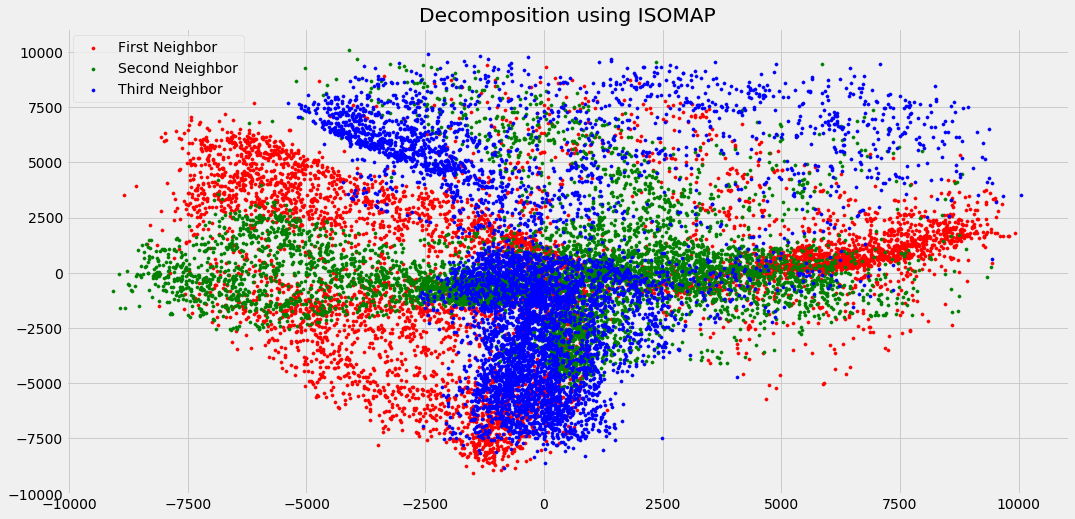

In [244]:
plt.figure(figsize=(16,8))
plt.title('Decomposition using ISOMAP')
plt.scatter(trans_data[:,0], trans_data[:,1], c='r',s= 10)
plt.scatter(trans_data[:,1], trans_data[:,2], c='g',s= 10)
plt.scatter(trans_data[:,2], trans_data[:,0],c='b',s= 10)
plt.legend(("First Neighbor", "Second Neighbor", "Third Neighbor"))

We can see that correlation between these components is very low. Infact, they are even less correlated when compared to the componets we obtained using SVD

<b>t-Distributed Stochastic Neighbor Embedding (t-SNE)</b>

This method is maily used when the data is strongly non-linear. So, fat we have learned that PCA is a good for dimensionality reduction and visualization for datasets with a large number of variables. But what if we could do something more advanced ?. What if we could easily search for patterns in a non linera way ? t-SNE is one such technique. There are mainly two approaches we can use to map the data points:

* Local approach: They map nearby points on the manifold to nearby points in the low dimensional representation.
* Global approach: They attempt to preserve geometry at all scales, (mapping nearyby points on manifold to neary by points in low dimensional representation as well as far away points to far away points)

t-SNE is one of the few algorithm which is capable of retaining both local and global structure of the data at the same time. It calcualtes the probability similarity of the points in high dimensional space as well as in low dimensional space. 

* High-dimensional Euclidean distances between data points are converted into conditional probabilites that represent similarities
* For low dimensional data points corresponding to the high dimensional data points, it is possibal to compute a similar conditional probability.
* After calculating both probabilities, it minimizes the difference between both the probabilities.



In [12]:
#t-sne implementation
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=300).fit_transform(df_train[new_cols][:6000].values)

n_components will decide the number of components in the transformed data. Now lets visualize the transformed data

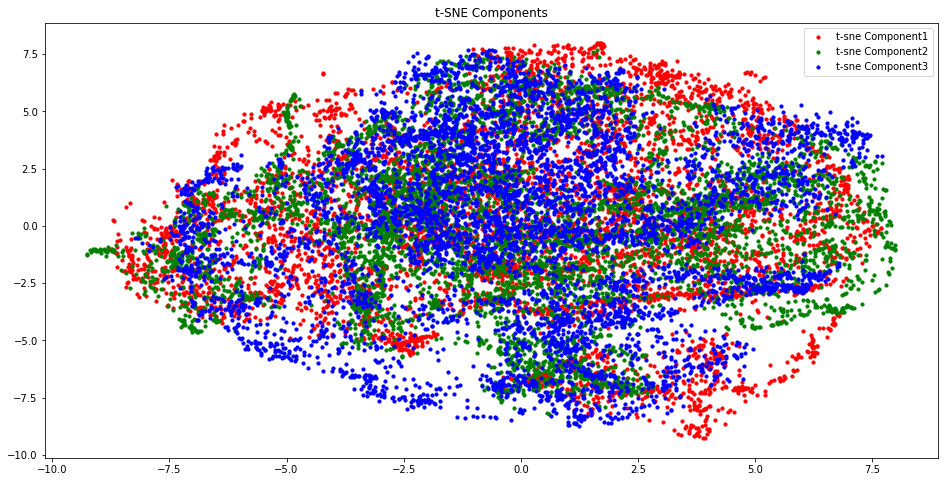

In [16]:
plt.figure(figsize=(16,8))
plt.title("t-SNE Components")
plt.scatter(tsne[:,0],tsne[:,1], c='r', s=10)
plt.scatter(tsne[:,1],tsne[:,2], c='g', s=10)
plt.scatter(tsne[:,2],tsne[:,0], c='b', s=10)
plt.legend(("t-sne Component1","t-sne Component2", "t-sne Component3"))

Here, we can clearly see the different components that have been transformed using the powerful t-SNE technique

* <b>Uniform Manifold Approximation and Projection (UMAP)</b>

t-SNE works very well on large datsets but it has several limitations, like loss of large-scale information, slow computation time, and inability to meaningfully represent very large datsets. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technoque which can presever as much of the local and more of the global data structure as compared to t-sne, with shorter runtime.

Some advantages of UMAP are:
* It can handle large datasets and high dimensional data without too much difficulty
* It combines the power of visualization with the ability to reduce the dimensions of the data
* Along with preserving the local structure, it also preserves the global structure of the data. UMAP maps nearby points on the manifold to nearby points in the low dimensional representation, and does the same for far away points.

This method uses the concept of k-neares neighbor and optimizes the results using stochastic gradient descent. It first calculates the distance between the points in high dimensional spcae, projects them onto the low dimensional space, and calcualtes the distance between points in this low dimensional sapce, it then uses Stochastic Gradient Descent to minimize the difference between these distances.

In [2]:
#implementation
import umap